In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Load datasets
train_df_raw = pd.read_csv("../data/train.csv")
test_df_raw = pd.read_csv("../data/test.csv")

In [4]:
# Check shape of train_df and test_df
print(f"train_df shape : {train_df_raw.shape}")
print(f"test_df shape : {test_df_raw.shape}")

train_df shape : (8693, 14)
test_df shape : (4277, 13)


In [5]:
# Check info of train_df_raw
train_df_raw_info = pd.DataFrame({
    "missing_sum": train_df_raw.isna().sum(),
    "missing_percent": train_df_raw.isna().sum() / len(train_df_raw) * 100,
    "dtypes": train_df_raw.dtypes,
    **train_df_raw.describe().T,
    **train_df_raw.describe(include="object").T
}).sort_values(by=["dtypes", "missing_sum"])

train_df_raw_info

,missing_sum,missing_percent,dtypes,count,mean,std,min,25%,50%,75%,max,unique,top,freq
Transported,0,0.000000,bool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,179,2.059128,float64,NaN,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0,NaN,NaN,NaN
RoomService,181,2.082135,float64,NaN,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0,NaN,NaN,NaN
FoodCourt,183,2.105142,float64,NaN,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0,NaN,NaN,NaN
Spa,183,2.105142,float64,NaN,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0,NaN,NaN,NaN
VRDeck,188,2.162660,float64,NaN,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0,NaN,NaN,NaN
ShoppingMall,208,2.392730,float64,NaN,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0,NaN,NaN,NaN
PassengerId,0,0.000000,object,8693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8693,0001_01,1
Destination,182,2.093639,object,8511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,TRAPPIST-1e,5915
Cabin,199,2.289198,object,8494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6560,G/734/S,8


In [6]:
# Check info of test_df_raw
test_df_raw_info = pd.DataFrame({
    "missing_sum": test_df_raw.isna().sum(),
    "missing_percent": test_df_raw.isna().sum() / len(test_df_raw) * 100,
    "dtypes": test_df_raw.dtypes,
    **test_df_raw.describe().T,
    **test_df_raw.describe(include="object").T
}).sort_values(by=["dtypes", "missing_sum"])

test_df_raw_info

,missing_sum,missing_percent,dtypes,count,mean,std,min,25%,50%,75%,max,unique,top,freq
VRDeck,80,1.870470,float64,NaN,310.710031,1246.994742,0.0,0.0,0.0,36.0,22272.0,NaN,NaN,NaN
RoomService,82,1.917232,float64,NaN,219.266269,607.011289,0.0,0.0,0.0,53.0,11567.0,NaN,NaN,NaN
Age,91,2.127660,float64,NaN,28.658146,14.179072,0.0,19.0,26.0,37.0,79.0,NaN,NaN,NaN
ShoppingMall,98,2.291326,float64,NaN,177.295525,560.821123,0.0,0.0,0.0,33.0,8292.0,NaN,NaN,NaN
Spa,101,2.361468,float64,NaN,303.052443,1117.186015,0.0,0.0,0.0,50.0,19844.0,NaN,NaN,NaN
FoodCourt,106,2.478373,float64,NaN,439.484296,1527.663045,0.0,0.0,0.0,78.0,25273.0,NaN,NaN,NaN
PassengerId,0,0.000000,object,4277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4277,0013_01,1
HomePlanet,87,2.034136,object,4190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Earth,2263
Destination,92,2.151040,object,4185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,TRAPPIST-1e,2956
CryoSleep,93,2.174421,object,4184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,False,2640


## 1. Exploratory Data Analysis (EDA)

### 1.1 Univariate Analysis

In [103]:
# Make a copy of the original train and test dataframes
train_df = train_df_raw.copy()
test_df = test_df_raw.copy()

#### 1.1.1 Numeric Features

In [104]:
train_df.select_dtypes(include="number").columns.values

array(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype=object)

In [119]:
# Check Age feature
print(f"Feature : Age")
print("=====================")
print("Train:")
print("---------------------")
print(f"Missing values : {train_df['Age'].isna().sum()}")
print("Description :")
print(train_df['Age'].describe())
print("=====================")
print("Test:")
print("---------------------")
print(f"Missing values : {test_df['Age'].isna().sum()}")
print("Description :")
print(test_df['Age'].describe())

Feature : Age
Train:
---------------------
Missing values : 179
Description :
count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64
Test:
---------------------
Missing values : 91
Description :
count    4186.000000
mean       28.658146
std        14.179072
min         0.000000
25%        19.000000
50%        26.000000
75%        37.000000
max        79.000000
Name: Age, dtype: float64


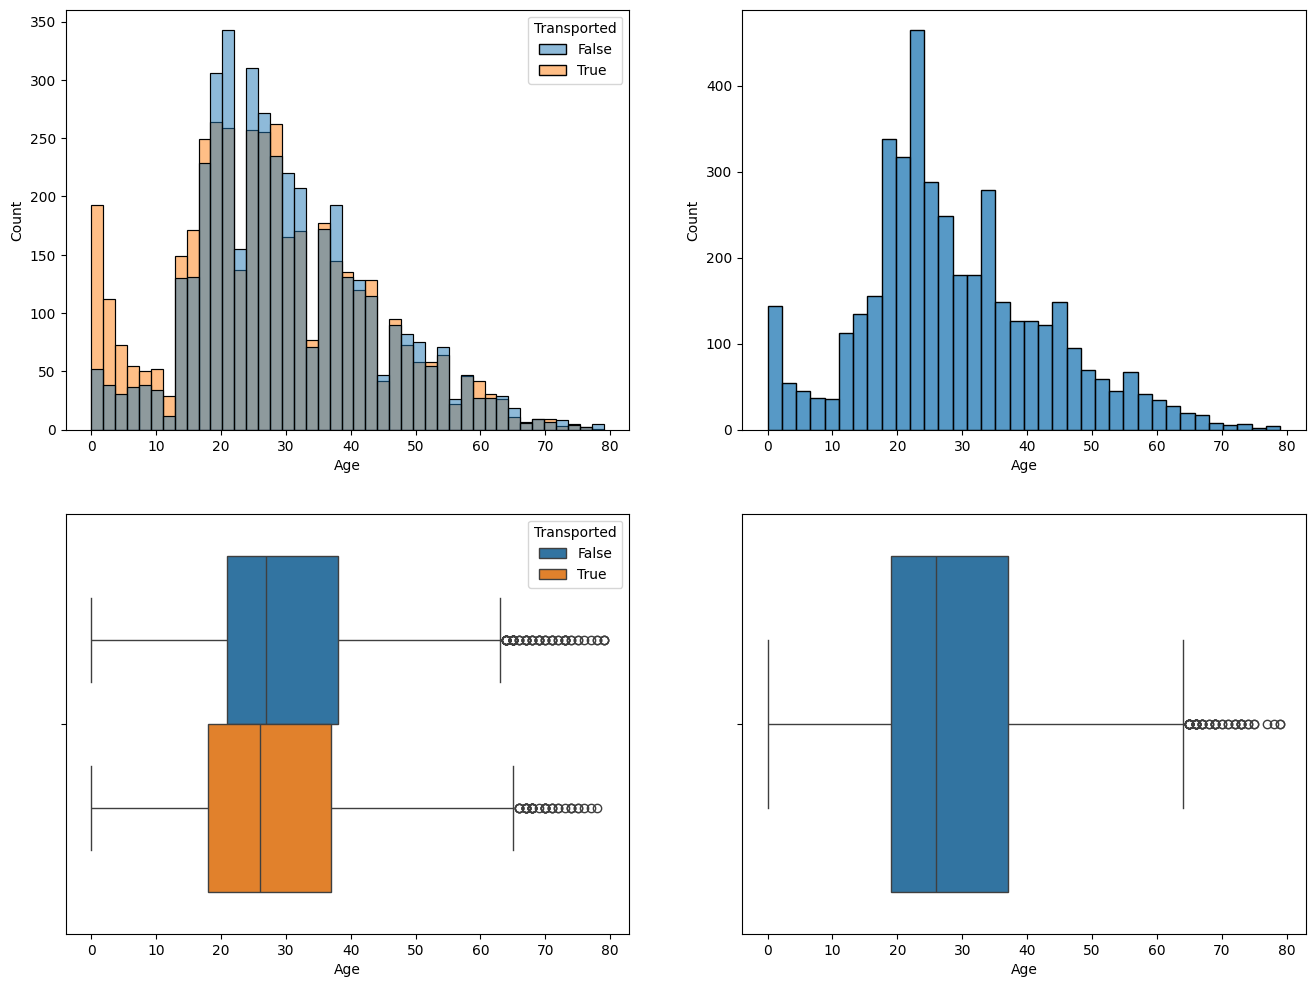

In [10]:
# Check distribution of Age
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
sns.histplot(train_df, x="Age", hue="Transported", ax=axes[0,0])
sns.boxplot(train_df, x="Age", hue="Transported", ax=axes[1,0])
sns.histplot(test_df, x="Age", ax=axes[0,1])
sns.boxplot(test_df, x="Age", ax=axes[1,1])
plt.show()

Feature : RoomService
Train:
---------------------
Missing values : 181
Description :
count     8512.000000
mean       224.687617
std        666.717663
min          0.000000
25%          0.000000
50%          0.000000
75%         47.000000
max      14327.000000
Name: RoomService, dtype: float64
Test:
---------------------
Missing values : 82
Description :
count     4195.000000
mean       219.266269
std        607.011289
min          0.000000
25%          0.000000
50%          0.000000
75%         53.000000
max      11567.000000
Name: RoomService, dtype: float64


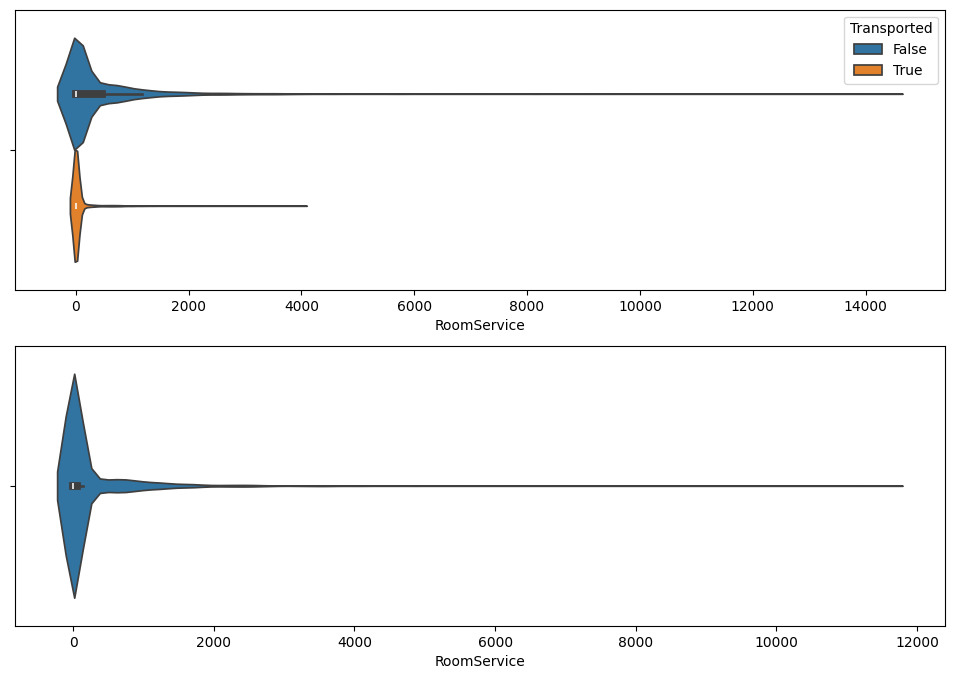

In [11]:
# Check RoomService feature
print(f"Feature : RoomService")
print("=====================")
print("Train:")
print("---------------------")
print(f"Missing values : {train_df['RoomService'].isna().sum()}")
print("Description :")
print(train_df['RoomService'].describe())
print("=====================")
print("Test:")
print("---------------------")
print(f"Missing values : {test_df['RoomService'].isna().sum()}")
print("Description :")
print(test_df['RoomService'].describe())

# Check distributions of RoomService
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
sns.violinplot(train_df, x="RoomService", hue="Transported", ax=axes[0])
sns.violinplot(test_df, x="RoomService", ax=axes[1])
plt.show()

Feature : FoodCourt
Train:
-------------------
Missing values : 183
Description :
count     8510.000000
mean       458.077203
std       1611.489240
min          0.000000
25%          0.000000
50%          0.000000
75%         76.000000
max      29813.000000
Name: FoodCourt, dtype: float64
Test:
-------------------
Missing values : 106
Description :
count     4171.000000
mean       439.484296
std       1527.663045
min          0.000000
25%          0.000000
50%          0.000000
75%         78.000000
max      25273.000000
Name: FoodCourt, dtype: float64


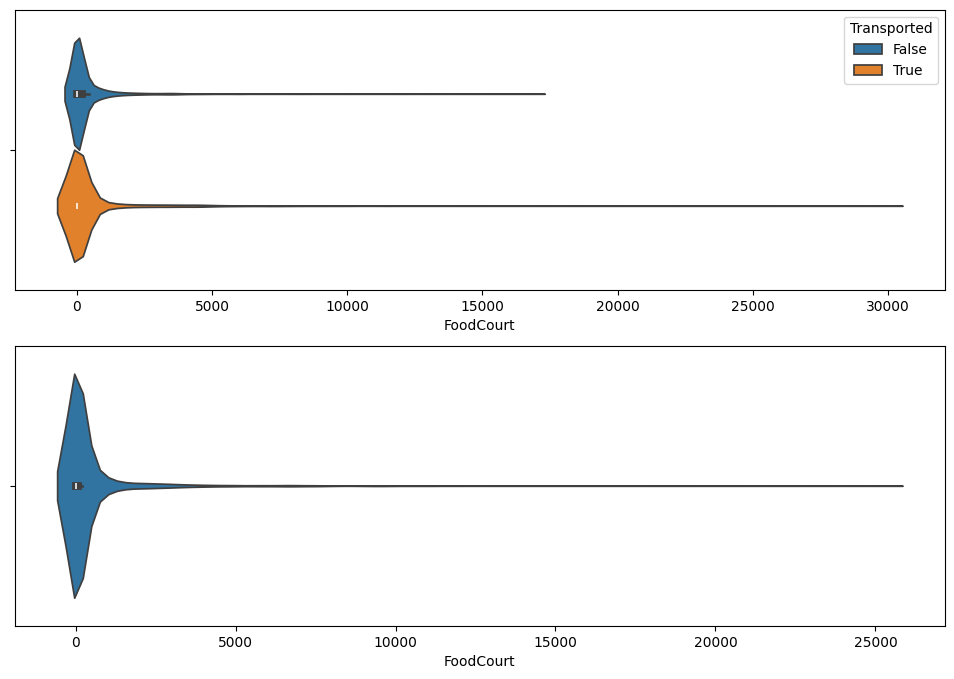

In [12]:
# Check FoodCourt feature
print(f"Feature : FoodCourt")
print("===================")
print("Train:")
print("-------------------")
print(f"Missing values : {train_df['FoodCourt'].isna().sum()}")
print("Description :")
print(train_df['FoodCourt'].describe())
print("===================")
print("Test:")
print("-------------------")
print(f"Missing values : {test_df['FoodCourt'].isna().sum()}")
print("Description :")
print(test_df['FoodCourt'].describe())

# Check distributions of FoodCourt
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
sns.violinplot(train_df, x="FoodCourt", hue="Transported", ax=axes[0])
sns.violinplot(test_df, x="FoodCourt", ax=axes[1])
plt.show()

Feature : ShoppingMall
Train:
----------------------
Missing values : 208
Description :
count     8485.000000
mean       173.729169
std        604.696458
min          0.000000
25%          0.000000
50%          0.000000
75%         27.000000
max      23492.000000
Name: ShoppingMall, dtype: float64
Test:
----------------------
Missing values : 98
Description :
count    4179.000000
mean      177.295525
std       560.821123
min         0.000000
25%         0.000000
50%         0.000000
75%        33.000000
max      8292.000000
Name: ShoppingMall, dtype: float64


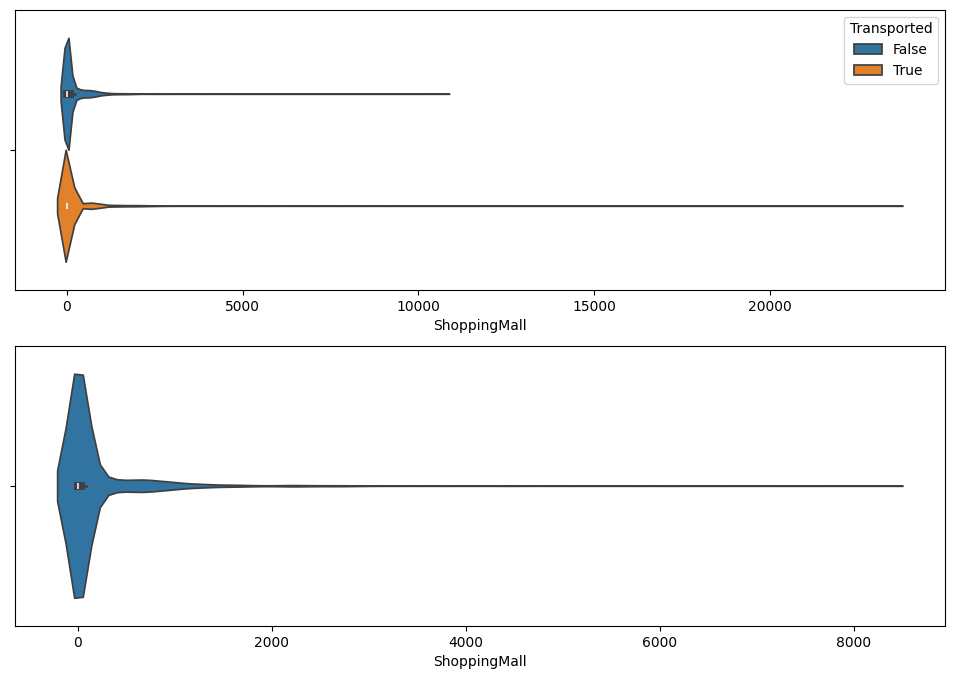

In [13]:
# Check ShoppingMall feature
print(f"Feature : ShoppingMall")
print("======================")
print("Train:")
print("----------------------")
print(f"Missing values : {train_df['ShoppingMall'].isna().sum()}")
print("Description :")
print(train_df['ShoppingMall'].describe())
print("======================")
print("Test:")
print("----------------------")
print(f"Missing values : {test_df['ShoppingMall'].isna().sum()}")
print("Description :")
print(test_df['ShoppingMall'].describe())

# Check distributions of ShoppingMall
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
sns.violinplot(train_df, x="ShoppingMall", hue="Transported", ax=axes[0])
sns.violinplot(test_df, x="ShoppingMall", ax=axes[1])
plt.show()

Feature : Spa
Train:
----------------------
Missing values : 183
Description :
count     8510.000000
mean       311.138778
std       1136.705535
min          0.000000
25%          0.000000
50%          0.000000
75%         59.000000
max      22408.000000
Name: Spa, dtype: float64
Test:
----------------------
Missing values : 101
Description :
count     4176.000000
mean       303.052443
std       1117.186015
min          0.000000
25%          0.000000
50%          0.000000
75%         50.000000
max      19844.000000
Name: Spa, dtype: float64


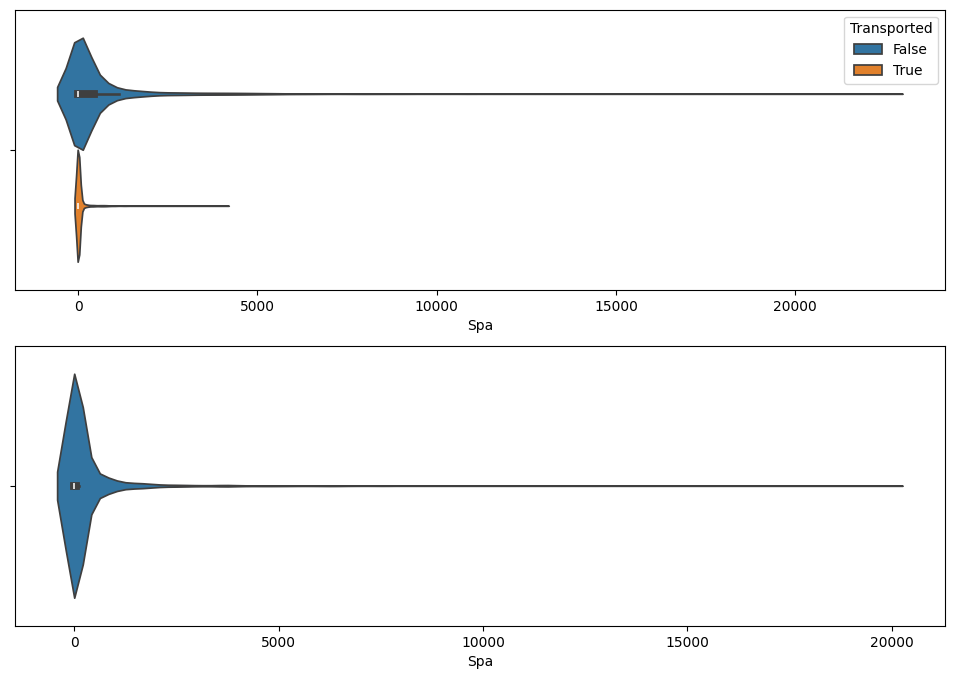

In [14]:
# Check Spa feature
print(f"Feature : Spa")
print("======================")
print("Train:")
print("----------------------")
print(f"Missing values : {train_df['Spa'].isna().sum()}")
print("Description :")
print(train_df['Spa'].describe())
print("======================")
print("Test:")
print("----------------------")
print(f"Missing values : {test_df['Spa'].isna().sum()}")
print("Description :")
print(test_df['Spa'].describe())

# Check distributions of Spa
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
sns.violinplot(train_df, x="Spa", hue="Transported", ax=axes[0])
sns.violinplot(test_df, x="Spa", ax=axes[1])
plt.show()

Feature : VRDeck
Train:
----------------------
Missing values : 188
Description :
count     8505.000000
mean       304.854791
std       1145.717189
min          0.000000
25%          0.000000
50%          0.000000
75%         46.000000
max      24133.000000
Name: VRDeck, dtype: float64
Test:
----------------------
Missing values : 80
Description :
count     4197.000000
mean       310.710031
std       1246.994742
min          0.000000
25%          0.000000
50%          0.000000
75%         36.000000
max      22272.000000
Name: VRDeck, dtype: float64


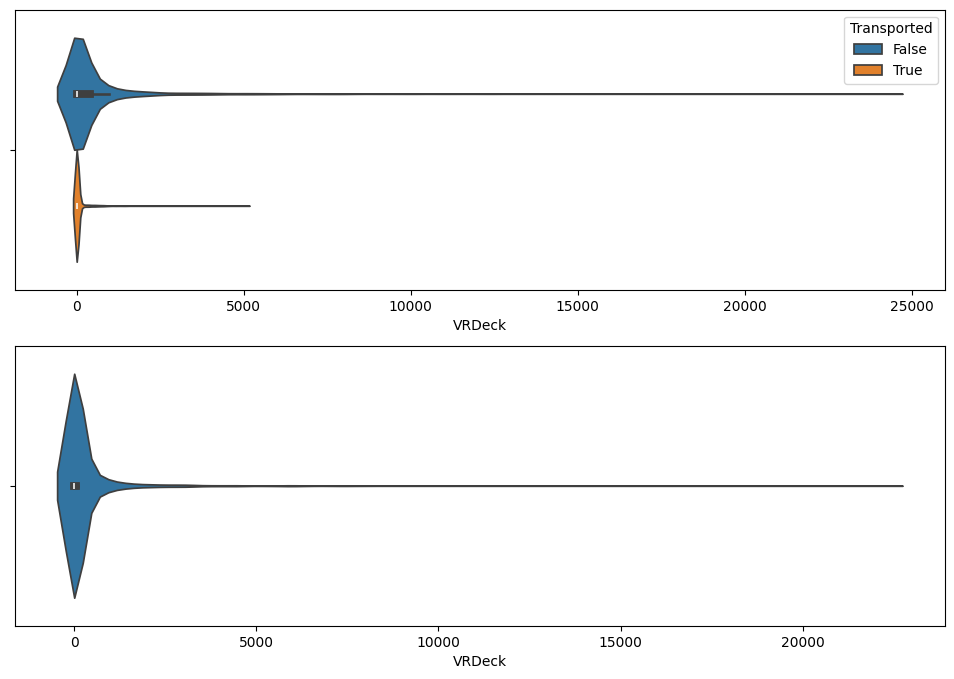

In [15]:
# Check VRDeck feature
print(f"Feature : VRDeck")
print("======================")
print("Train:")
print("----------------------")
print(f"Missing values : {train_df['VRDeck'].isna().sum()}")
print("Description :")
print(train_df['VRDeck'].describe())
print("======================")
print("Test:")
print("----------------------")
print(f"Missing values : {test_df['VRDeck'].isna().sum()}")
print("Description :")
print(test_df['VRDeck'].describe())

# Check distributions of VRDeck
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
sns.violinplot(train_df, x="VRDeck", hue="Transported", ax=axes[0])
sns.violinplot(test_df, x="VRDeck", ax=axes[1])
plt.show()

#### 1.1.2 Object Features

In [105]:
object_features = train_df.select_dtypes(include="object").columns.values
object_features

array(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination',
       'VIP', 'Name'], dtype=object)

In [86]:
# Check PassengerId feature
print("Feature: PassengerId")
print("==================")
print("Train:")
print("------------------")
print(f"Missing values : {train_df['PassengerId'].isna().sum()}")
print(f"Number of unique values : {train_df['PassengerId'].nunique()}")
print(
    "Most frequent : "
    f"{train_df['PassengerId'].value_counts(ascending=True).agg(['max', 'idxmax']).tolist()}"
)
print("==================")
print("Test:")
print("------------------")
print(f"Missing values : {test_df['PassengerId'].isna().sum()}")
print(f"Number of unique values : {test_df['PassengerId'].nunique()}")
print(
    "Most frequent : "
    f"{test_df['PassengerId'].value_counts(ascending=True).agg(['max', 'idxmax']).tolist()}"
)

Feature: PassengerId
Train:
------------------
Missing values : 0
Number of unique values : 8693
Most frequent : [1, '0001_01']
Test:
------------------
Missing values : 0
Number of unique values : 4277
Most frequent : [1, '0013_01']


In [120]:
# Show sample elements of PassengerId
train_df["PassengerId"].sample(10)

729     0770_02
4619    4923_03
2429    2602_01
3632    3904_01
4660    4972_01
5197    5543_01
3792    4045_01
4374    4655_02
3070    3313_01
2136    2291_03
Name: PassengerId, dtype: object

Feature: HomePlanet
Train:
------------------
Missing values : 201
Number of unique values : 3
Most frequent : [4602, 'Earth']
Test:
------------------
Missing values : 87
Number of unique values : 3
Most frequent : [2263, 'Earth']


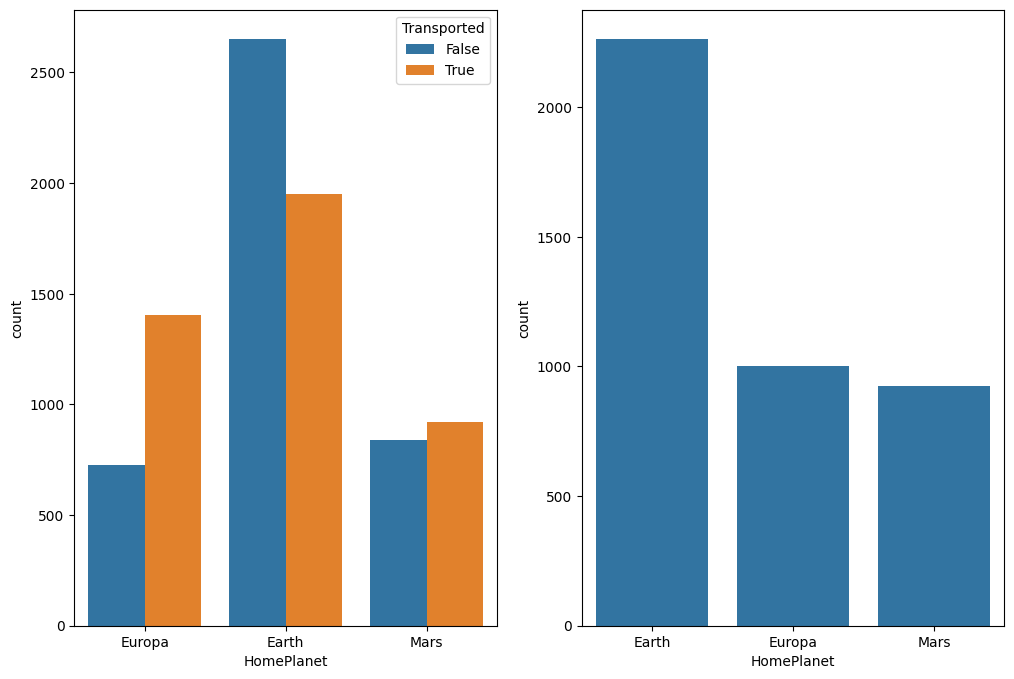

In [17]:
# Check HomePlanet feature
print("Feature: HomePlanet")
print("==================")
print("Train:")
print("------------------")
print(f"Missing values : {train_df['HomePlanet'].isna().sum()}")
print(f"Number of unique values : {train_df['HomePlanet'].nunique()}")
print(
    "Most frequent : "
    f"{train_df['HomePlanet'].value_counts(ascending=True).agg(['max', 'idxmax']).tolist()}"
)
print("==================")
print("Test:")
print("------------------")
print(f"Missing values : {test_df['HomePlanet'].isna().sum()}")
print(f"Number of unique values : {test_df['HomePlanet'].nunique()}")
print(
    "Most frequent : "
    f"{test_df['HomePlanet'].value_counts(ascending=True).agg(['max', 'idxmax']).tolist()}"
)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
sns.countplot(train_df, x="HomePlanet", hue="Transported", ax=axes[0])
sns.countplot(test_df, x="HomePlanet", ax=axes[1])
plt.show()

Feature: CryoSleep
Train:
------------------
Missing values : 217
Number of unique values : 2
Most frequent : [5439, False]
Test:
------------------
Missing values : 93
Number of unique values : 2
Most frequent : [2640, False]


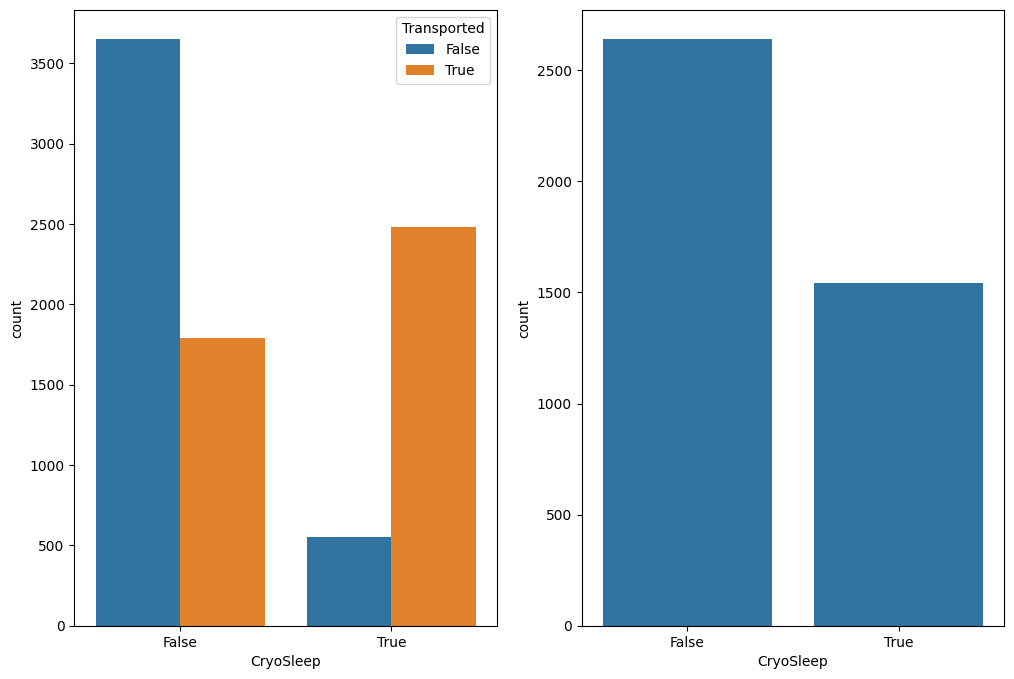

In [18]:
# Check CryoSleep feature
print("Feature: CryoSleep")
print("=================")
print("Train:")
print("------------------")
print(f"Missing values : {train_df['CryoSleep'].isna().sum()}")
print(f"Number of unique values : {train_df['CryoSleep'].nunique()}")
print(
    "Most frequent : "
    f"{train_df['CryoSleep'].value_counts(ascending=True).agg(['max', 'idxmax']).tolist()}"
)
print("==================")
print("Test:")
print("------------------")
print(f"Missing values : {test_df['CryoSleep'].isna().sum()}")
print(f"Number of unique values : {test_df['CryoSleep'].nunique()}")
print(
    "Most frequent : "
    f"{test_df['CryoSleep'].value_counts(ascending=True).agg(['max', 'idxmax']).tolist()}"
)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
sns.countplot(train_df, x="CryoSleep", hue="Transported", ax=axes[0])
sns.countplot(test_df, x="CryoSleep", ax=axes[1])
plt.show()

In [25]:
# Check Cabin feature
print("Feature: Cabin")
print("=============")
print("Train:")
print("------------------")
print(f"Missing values : {train_df['Cabin'].isna().sum()}")
print(f"Number of unique values : {train_df['Cabin'].nunique()}")
print(
    "Most frequent : "
    f"{train_df['Cabin'].value_counts(ascending=True).agg(['max', 'idxmax']).tolist()}"
)
print("==================")
print("Test:")
print("------------------")
print(f"Missing values : {test_df['Cabin'].isna().sum()}")
print(f"Number of unique values : {test_df['Cabin'].nunique()}")
print(
    "Most frequent : "
    f"{test_df['Cabin'].value_counts(ascending=True).agg(['max', 'idxmax']).tolist()}"
)

Feature: Cabin
Train:
------------------
Missing values : 199
Number of unique values : 6560
Most frequent : [8, 'G/734/S']
Test:
------------------
Missing values : 100
Number of unique values : 3265
Most frequent : [8, 'G/160/P']


In [37]:
# Show sample elements of Cabin
train_df["Cabin"].sample(10)

3618     F/735/S
452       B/17/S
2708     F/601/P
2978     G/522/P
6021    G/1033/S
5674      A/57/P
7457     B/261/P
7289    F/1491/S
8011    F/1653/S
1324     G/215/S
Name: Cabin, dtype: object

Feature: Destination
Train:
------------------
Missing values : 182
Number of unique values : 3
Most frequent : [5915, 'TRAPPIST-1e']
Test:
------------------
Missing values : 92
Number of unique values : 3
Most frequent : [2956, 'TRAPPIST-1e']


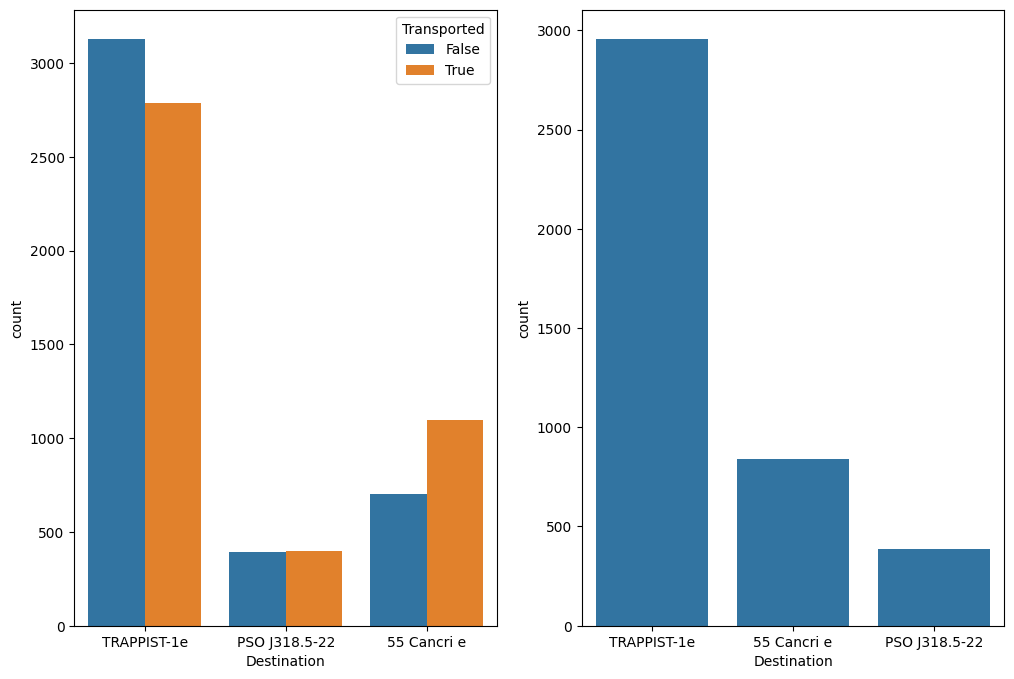

In [39]:
# Check Destination feature
print("Feature: Destination")
print("===================")
print("Train:")
print("------------------")
print(f"Missing values : {train_df['Destination'].isna().sum()}")
print(f"Number of unique values : {train_df['Destination'].nunique()}")
print(
    "Most frequent : "
    f"{train_df['Destination'].value_counts(ascending=True).agg(['max', 'idxmax']).tolist()}"
)
print("==================")
print("Test:")
print("------------------")
print(f"Missing values : {test_df['Destination'].isna().sum()}")
print(f"Number of unique values : {test_df['Destination'].nunique()}")
print(
    "Most frequent : "
    f"{test_df['Destination'].value_counts(ascending=True).agg(['max', 'idxmax']).tolist()}"
)

# Check distribution of Destination
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
sns.countplot(train_df, x="Destination", hue="Transported", ax=axes[0])
sns.countplot(test_df, x="Destination", ax=axes[1])
plt.show()

Feature: VIP
Train:
------------------
Missing values : 203
Number of unique values : 2
Most frequent : [8291, False]
Test:
------------------
Missing values : 93
Number of unique values : 2
Most frequent : [4110, False]


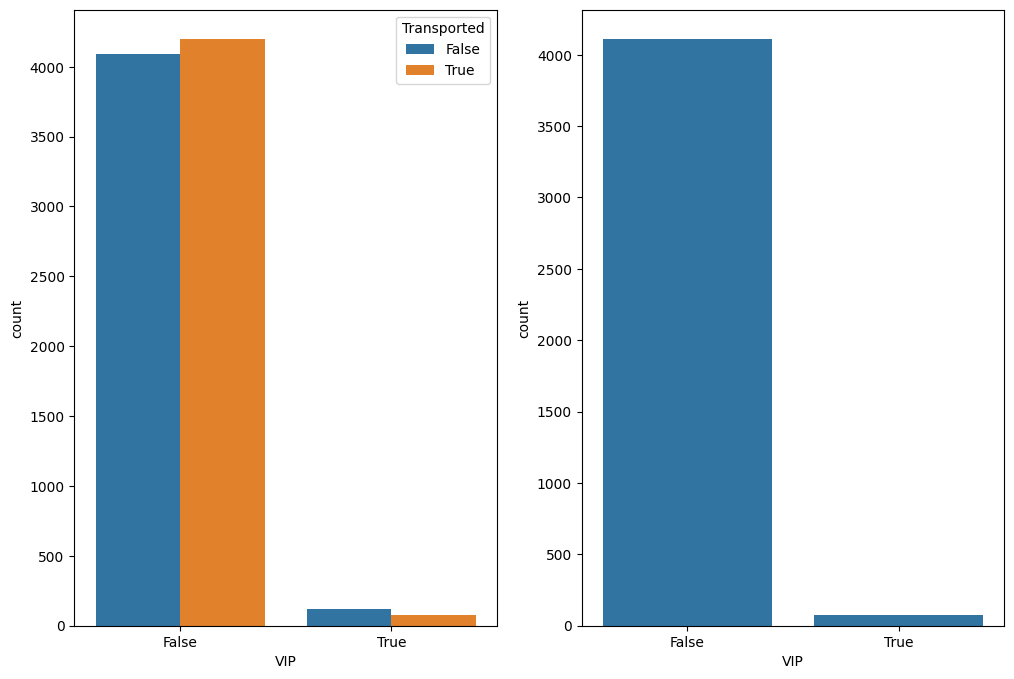

In [40]:
# Check VIP feature
print("Feature: VIP")
print("===========")
print("Train:")
print("------------------")
print(f"Missing values : {train_df['VIP'].isna().sum()}")
print(f"Number of unique values : {train_df['VIP'].nunique()}")
print(
    "Most frequent : "
    f"{train_df['VIP'].value_counts(ascending=True).agg(['max', 'idxmax']).tolist()}"
)
print("==================")
print("Test:")
print("------------------")
print(f"Missing values : {test_df['VIP'].isna().sum()}")
print(f"Number of unique values : {test_df['VIP'].nunique()}")
print(
    "Most frequent : "
    f"{test_df['VIP'].value_counts(ascending=True).agg(['max', 'idxmax']).tolist()}"
)

# Check distribution of VIP
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
sns.countplot(train_df, x="VIP", hue="Transported", ax=axes[0])
sns.countplot(test_df, x="VIP", ax=axes[1])
plt.show()

In [41]:
# Check Name feature
print("Feature: Name")
print("============")
print("Train:")
print("------------------")
print(f"Missing values : {train_df['Name'].isna().sum()}")
print(f"Number of unique values : {train_df['Name'].nunique()}")
print(
    "Most frequent : "
    f"{train_df['Name'].value_counts(ascending=True).agg(['max', 'idxmax']).tolist()}"
)
print("==================")
print("Test:")
print("------------------")
print(f"Missing values : {test_df['Name'].isna().sum()}")
print(f"Number of unique values : {test_df['Name'].nunique()}")
print(
    "Most frequent : "
    f"{test_df['Name'].value_counts(ascending=True).agg(['max', 'idxmax']).tolist()}"
)

Feature: Name
Train:
------------------
Missing values : 200
Number of unique values : 8473
Most frequent : [2, 'Asch Stradick']
Test:
------------------
Missing values : 94
Number of unique values : 4176
Most frequent : [2, 'Cocors Cola']


In [42]:
# Show sample elements of Name
train_df["Name"].sample(10)

1408    Katiey Gallencis
7151            Ban Stre
4402      Billey Byerson
2333      Loree Mathison
7503          Losp Ruité
4120       All Wolferton
3795    Schyon Pokematic
166      Tance Adavisons
4049    Dellia Douglasen
5977      Scotty Avidson
Name: Name, dtype: object

#### 1.1.3 Engineering Features

In [110]:
# Combine RoomService, FoodCourt, ShoppingMall, Spa, and VRDeck into an Luxury feature
luxury_features = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
train_df["Luxury"] = train_df[luxury_features].sum(axis=1)
test_df["Luxury"] = test_df[luxury_features].sum(axis=1)

# Extract group from PassengerId
train_df["Group"] = train_df["PassengerId"].apply(lambda x: x.split("_")[0])
test_df["Group"] = test_df["PassengerId"].apply(lambda x: x.split("_")[0])

# Break Cabin feature into Deck and Side
cabins_train = train_df[train_df["Cabin"].notna()]["Cabin"]
train_df["Deck"] = cabins_train.apply(lambda x: x.split("/")[0])
train_df["Side"] = cabins_train.apply(lambda x: x.split("/")[2])

cabins_test = test_df[test_df["Cabin"].notna()]["Cabin"]
test_df["Deck"] = cabins_test.apply(lambda x: x.split("/")[0])
test_df["Side"] = cabins_test.apply(lambda x: x.split("/")[2])

Feature : Luxury
Train:
----------------------
Missing values : 0
Description :
count     8693.000000
mean      1440.866329
std       2803.045694
min          0.000000
25%          0.000000
50%        716.000000
75%       1441.000000
max      35987.000000
Name: Luxury, dtype: float64
Test:
----------------------
Missing values : 0
Description :
count     4277.00000
mean      1417.68202
std       2816.40210
min          0.00000
25%          0.00000
50%        714.00000
75%       1444.00000
max      33666.00000
Name: Luxury, dtype: float64


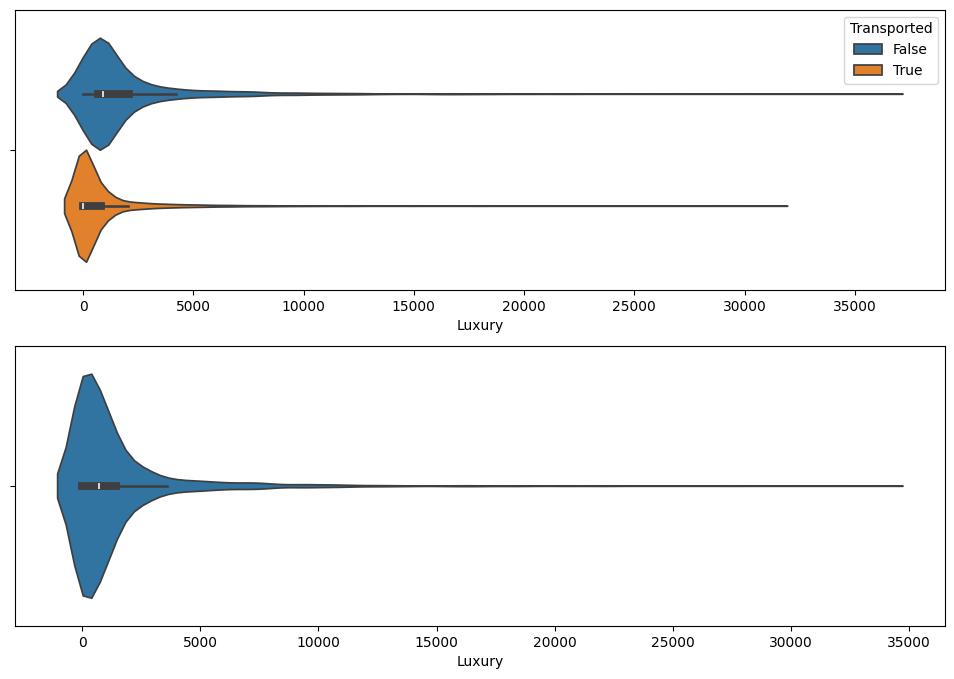

In [111]:
# Check Luxury feature
print(f"Feature : Luxury")
print("======================")
print("Train:")
print("----------------------")
print(f"Missing values : {train_df['Luxury'].isna().sum()}")
print("Description :")
print(train_df['Luxury'].describe())
print("======================")
print("Test:")
print("----------------------")
print(f"Missing values : {test_df['Luxury'].isna().sum()}")
print("Description :")
print(test_df['Luxury'].describe())

# Check distributions of Luxury
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
sns.violinplot(train_df, x="Luxury", hue="Transported", ax=axes[0])
sns.violinplot(test_df, x="Luxury", ax=axes[1])
plt.show()

In [112]:
# Check Group feature
print("Feature: Group")
print("==================")
print("Train:")
print("------------------")
print(f"Missing values : {train_df['Group'].isna().sum()}")
print(f"Number of unique values : {train_df['Group'].nunique()}")
print(
    "Most frequent : "
    f"{train_df['Group'].value_counts(ascending=True).agg(['max', 'idxmax']).tolist()}"
)
print("==================")
print("Test:")
print("------------------")
print(f"Missing values : {test_df['Group'].isna().sum()}")
print(f"Number of unique values : {test_df['Group'].nunique()}")
print(
    "Most frequent : "
    f"{test_df['Group'].value_counts(ascending=True).agg(['max', 'idxmax']).tolist()}"
)

Feature: Group
Train:
------------------
Missing values : 0
Number of unique values : 6217
Most frequent : [8, '5885']
Test:
------------------
Missing values : 0
Number of unique values : 3063
Most frequent : [8, '1072']


Feature: Deck
Train:
------------------
Missing values : 199
Number of unique values : 8
Most frequent : [2794, 'F']
Test:
------------------
Missing values : 100
Number of unique values : 8
Most frequent : [1445, 'F']


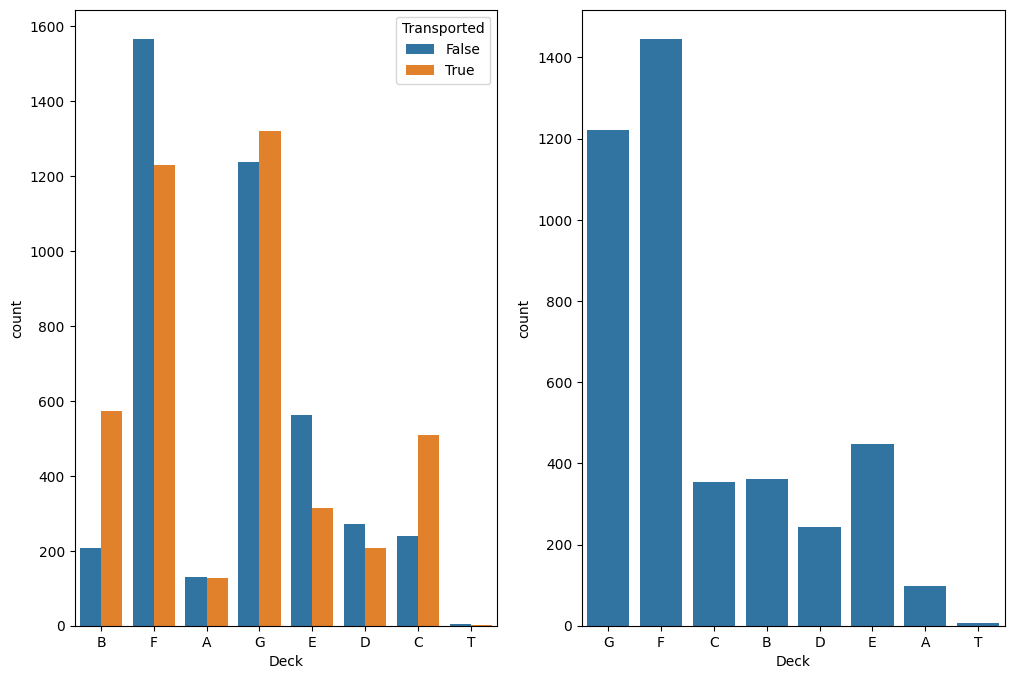

In [113]:
# Check Deck feature
print("Feature: Deck")
print("==================")
print("Train:")
print("------------------")
print(f"Missing values : {train_df['Deck'].isna().sum()}")
print(f"Number of unique values : {train_df['Deck'].nunique()}")
print(
    "Most frequent : "
    f"{train_df['Deck'].value_counts(ascending=True).agg(['max', 'idxmax']).tolist()}"
)
print("==================")
print("Test:")
print("------------------")
print(f"Missing values : {test_df['Deck'].isna().sum()}")
print(f"Number of unique values : {test_df['Deck'].nunique()}")
print(
    "Most frequent : "
    f"{test_df['Deck'].value_counts(ascending=True).agg(['max', 'idxmax']).tolist()}"
)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
sns.countplot(train_df, x="Deck", hue="Transported", ax=axes[0])
sns.countplot(test_df, x="Deck", ax=axes[1])
plt.show()

Feature: Side
Train:
------------------
Missing values : 199
Number of unique values : 2
Most frequent : [4288, 'S']
Test:
------------------
Missing values : 100
Number of unique values : 2
Most frequent : [2093, 'S']


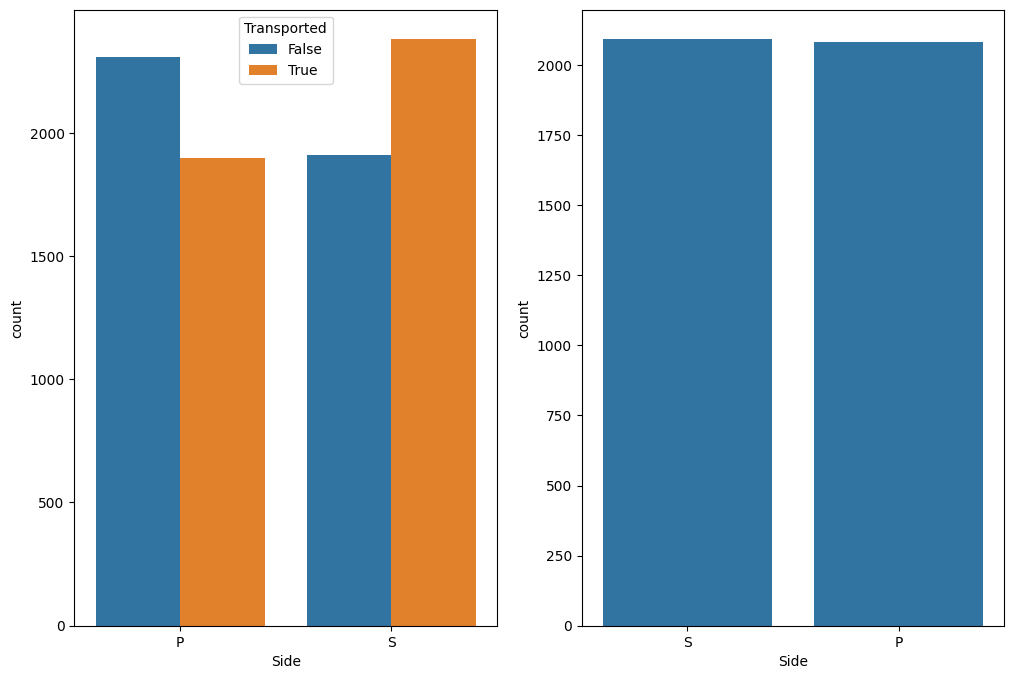

In [114]:
# Check Side feature
print("Feature: Side")
print("==================")
print("Train:")
print("------------------")
print(f"Missing values : {train_df['Side'].isna().sum()}")
print(f"Number of unique values : {train_df['Side'].nunique()}")
print(
    "Most frequent : "
    f"{train_df['Side'].value_counts(ascending=True).agg(['max', 'idxmax']).tolist()}"
)
print("==================")
print("Test:")
print("------------------")
print(f"Missing values : {test_df['Side'].isna().sum()}")
print(f"Number of unique values : {test_df['Side'].nunique()}")
print(
    "Most frequent : "
    f"{test_df['Side'].value_counts(ascending=True).agg(['max', 'idxmax']).tolist()}"
)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
sns.countplot(train_df, x="Side", hue="Transported", ax=axes[0])
sns.countplot(test_df, x="Side", ax=axes[1])
plt.show()

### 1.2 Multivariate Analysis

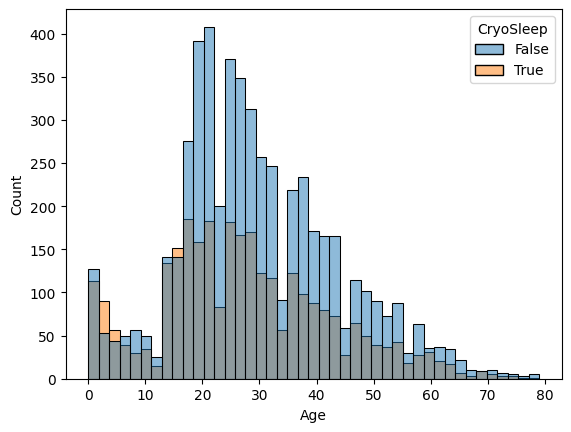

In [128]:
# Check relationship between Age and CryoSleep
sns.histplot(train_df, x="Age", hue="CryoSleep");

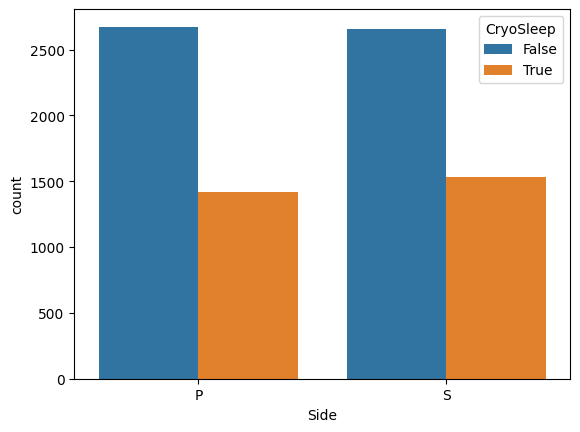

In [130]:
# Check relationship between Side and CryoSleep
sns.countplot(train_df, x="Side", hue="CryoSleep");

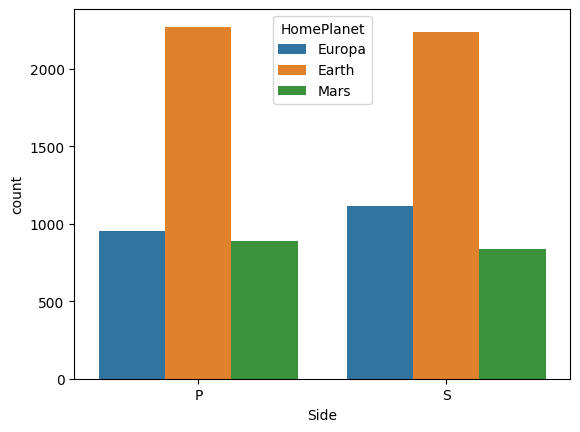

In [132]:
# Check relationship between Side and HomePlanet
sns.countplot(train_df, x="Side", hue="HomePlanet");

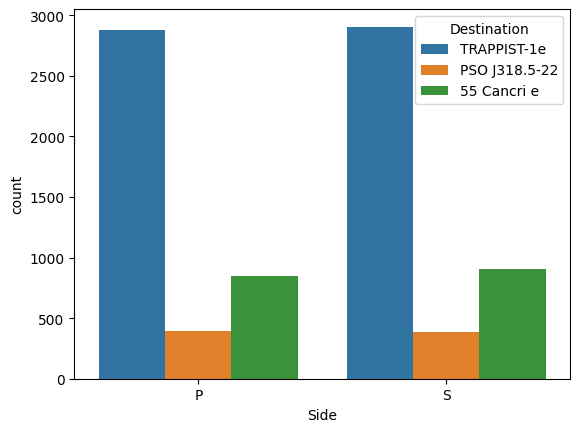

In [131]:
# Check relationship between Side and Destination
sns.countplot(train_df, x="Side", hue="Destination");

<Axes: >

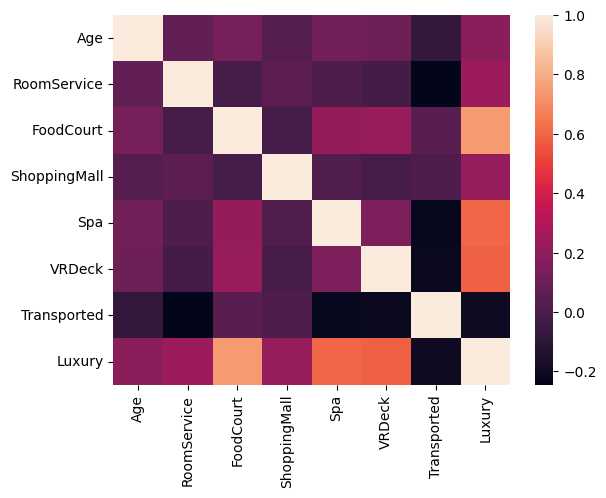

In [101]:
# Visualize correlation between numeric features
sns.heatmap(train_df.corr(numeric_only=True))

### 1.3 Summary

**Actions:**
- Impute `Age` based on `mean` and standardize
- Impute `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` with median and hard standardize (PowerStandard)
- Impute `HomePlanet` with most frequent and treat as *cardinal*
- Impute `CryoSleep` with most frequent and treat as *cardinal*
- Break `Cabin` into `Deck` and `Side` and impute with `U`.
- Impute `Destination` with most frequent and treat as *cardinal*
- Impute `VIP` with most frequent
- Drop `Name`

## 2. Data Preprocessing

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PowerTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [145]:
# Helper functions
def drop_features(dfs: list[pd.DataFrame], features: list[str]) -> list[pd.DataFrame]:
    return [df.drop(features, axis=1) for df in dfs]

In [195]:
# Make a copy of training and testing data
X_train_full, y_train_full = train_df_raw.drop("Transported", axis=1), train_df_raw["Transported"]
X_test = test_df_raw.copy()

X_train_full = X_train_full.set_index("PassengerId")
y_train_full = y_train_full.astype(int)
X_test = X_test.set_index("PassengerId")

In [197]:
# Drop unncessary features
X_train_full, X_test = drop_features([X_train_full, X_test], ["Name"])

In [198]:
# Break Cabin into Deck and Side
cabins_train = X_train_full[X_train_full["Cabin"].notna()]["Cabin"]
X_train_full["Deck"] = cabins_train.apply(lambda x: x.split("/")[0])
X_train_full["Side"] = cabins_train.apply(lambda x: x.split("/")[2])
X_train_full = X_train_full.drop("Cabin", axis=1)

cabins_test = X_test[X_test["Cabin"].notna()]["Cabin"]
X_test["Deck"] = cabins_test.apply(lambda x: x.split("/")[0])
X_test["Side"] = cabins_test.apply(lambda x: x.split("/")[2])
X_test = X_test.drop("Cabin", axis=1)

In [199]:
# Split the training dataset into train and valid
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.15, random_state=42)

# Check shape of resulting dataframes
print(f"X_train shape : {X_train.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"X_valid shape : {X_valid.shape}")
print(f"y_valid shape : {y_valid.shape}")
print(f"X_test shape : {X_test.shape}")

X_train shape : (7389, 12)
y_train shape : (7389,)
X_valid shape : (1304, 12)
y_valid shape : (1304,)
X_test shape : (4277, 12)


In [200]:
# Create Pipeline to impute and standardize remaining features

# Create numeric feature transformer
numeric_t1_features = ["Age"]
numeric_t1_transformer = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("imputer", SimpleImputer(strategy="mean"))
])

numeric_t2_features = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
numeric_t2_transformer = Pipeline(steps=[
    ("scaler", PowerTransformer()),
    ("imputer", SimpleImputer(strategy="most_frequent"))
])

# Create categorical feature transformer
cardinal_t1_features = ["HomePlanet", "CryoSleep", "Destination", "VIP"]
cardinal_t1_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(drop="first"))
])

cardinal_t2_features = ["Deck", "Side"]
cardinal_t2_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="U")),
    ("encoder", OneHotEncoder(drop="first"))
])


preprocessor = ColumnTransformer(transformers=[
    ("numeric_t1_transformer", numeric_t1_transformer, numeric_t1_features),
    ("numeric_t2_transformer", numeric_t2_transformer, numeric_t2_features),
    ("cardinal_t1_transformer", cardinal_t1_transformer, cardinal_t1_features),
    ("cardinal_t2_transformer", cardinal_t2_transformer, cardinal_t2_features),
], remainder="passthrough")

In [201]:
# Check if the preprocessor works as intended
preprocessor.fit(X_train)

for name, data in [("train", X_train), ("valid", X_valid), ("test", X_test)]:
    print("===========================")
    print(f"Checking for {name} data")
    print("===========================")
    df = pd.DataFrame(preprocessor.transform(data))
    print(f"Missing values : {df.isna().sum().tolist()}")
    print(f"Data types : {df.dtypes.tolist()}")

Checking for train data
Missing values : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Data types : [dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64')]
Checking for valid data
Missing values : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Data types : [dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), 

## 3. Modelling

In [202]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier

In [205]:
# Build a baseline model
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    # ("model", RandomForestClassifier(n_jobs=-1, random_state=42, verbose=0))
    ("model", CatBoostClassifier(verbose=0))
])

# Fit model on training set
model.fit(X_train, y_train)

# Evaluate model on validation set
model.score(X_valid, y_valid)

0.7921779141104295

In [207]:
# Perform a grid search cross-validation

# Define the parameter grid
param_grid = {
    "model__iterations": [1000, 2000],
    "model__max_depth": [6, 8, 10],
}

# Build a grid search model
model_gs = GridSearchCV(model, param_grid=param_grid, cv=3)

# Fit model on the full training dataset
model_gs.fit(X_train_full, y_train_full)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric_t1_transformer',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Age']),
                                                                        ('numeric_t2_transformer',
                                                                         Pipeline(steps=[('scaler',
                                                                                          PowerTransformer()),
                                                                                         ('imputer',
                                                                                          SimpleImputer(strategy='most_frequent'))])...
                                                                         ['HomePlanet',
                                                                          'CryoSleep',
                                                                          'Destination',
                                                                          'VIP']),
                                                                        ('cardinal_t2_transformer',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='U',
                                                                                                        strategy='constant')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(drop='first'))]),
                                                                         ['Deck',
                                                                          'Side'])])),
                                       ('model',
                                        <catboost.core.CatBoostClassifier object at 0x29b1e1410>)]),
             param_grid={'model__iterations': [1000, 2000],
                         'model__max_depth': [6, 8, 10]})

In [208]:
# Get best parameters found from grid search
best_params = model_gs.best_estimator_["model"].get_params()
print(f"Best parameters found: {best_params}")

# Instantiate tuned model
model_tuned = Pipeline(steps=[
    ("preprocessor", preprocessor),
    # ("model", RandomForestClassifier(**best_params))
    ("model", CatBoostClassifier(**best_params))
])

# Fit tuned model on training set
model_tuned.fit(X_train, y_train)

# Evaluate model on validation set
model_tuned.score(X_valid, y_valid)

Best parameters found: {'verbose': 0, 'iterations': 2000, 'max_depth': 6}


0.7975460122699386

In [217]:
# Refit tuned model on the full training dataset
model_tuned.fit(X_train_full, y_train_full)

# Make predictions on the test set
predictions = model_tuned.predict(X_test).astype(bool)
predictions

array([ True, False,  True, ...,  True,  True,  True])

In [218]:
# Save model
from joblib import dump

model_folder_name = "../models/"
model_file_name = "simple_catboost_model.csv"
dump(model_tuned, model_folder_name + model_file_name)

['../models/simple_catboost_model.csv']

In [219]:
# Create submission dataframe
submission = pd.DataFrame({"PassengerId": X_test.index, "Transported": predictions})

# Export submission to a csv
submission_folder_name = "../submissions/"
submission_file_name = "simple_catboost_submission.csv"
submission.to_csv(submission_folder_name + submission_file_name, index=False)